Top Products:
 Product
Monitor     430
Desk        400
Chair       300
Keyboard    250
Mouse        50
Name: Sales, dtype: int64


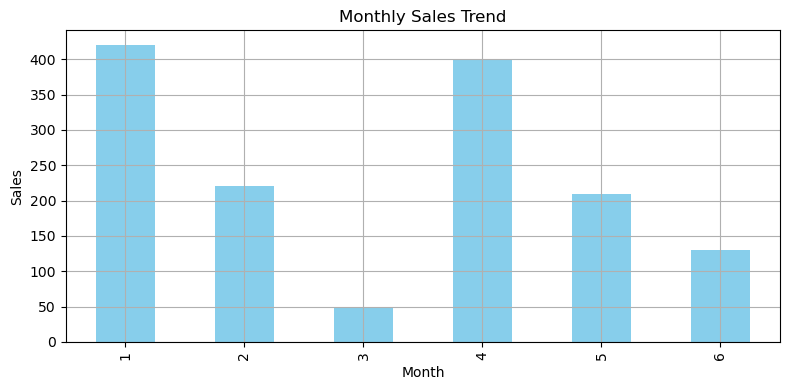

Top Customers:
 Customer Name
David      400
Bob        300
Charlie    220
Eve        210
Alice      170
Frank      130
Name: Sales, dtype: int64


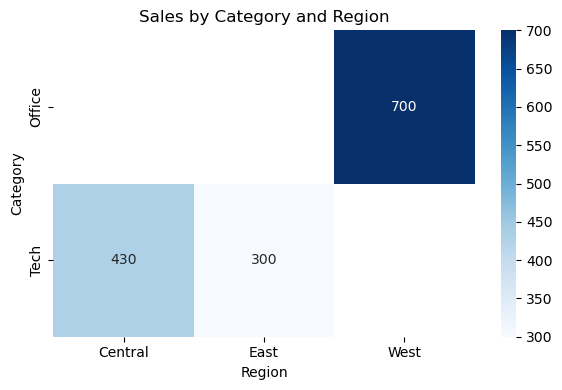

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create sample data
data = {
    'Order ID': [1, 2, 3, 4, 5, 6, 7],
    'Order Date': ['2023-01-15', '2023-01-17', '2023-02-05', '2023-03-12', '2023-04-01', '2023-05-20', '2023-06-15'],
    'Customer Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Eve', 'Frank'],
    'Product': ['Keyboard', 'Chair', 'Monitor', 'Mouse', 'Desk', 'Monitor', 'Keyboard'],
    'Category': ['Tech', 'Office', 'Tech', 'Tech', 'Office', 'Tech', 'Tech'],
    'Region': ['East', 'West', 'Central', 'East', 'West', 'Central', 'East'],
    'Sales': [120, 300, 220, 50, 400, 210, 130]
}

# Step 3: Save to CSV
df = pd.DataFrame(data)
df.to_csv('sales_data.csv', index=False)

# Step 4: Load the data
df = pd.read_csv('sales_data.csv')

# Step 5: Data preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month

# Step 6: Top selling products
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", top_products)

# Step 7: Monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(8,4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Top customers
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top Customers:\n", top_customers)

# Step 9: Sales by Category and Region
pivot = df.pivot_table(index='Category', columns='Region', values='Sales', aggfunc='sum')
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Sales by Category and Region')
plt.tight_layout()
plt.show()
